# **Boston Housing Price Prediction**

The objective of this notebook is to show the process involved in a classic task in data science: regression. The dataset used comes from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) and provide prices as well as many other features from houses in the Boston area.

## Data Exploration and Wrangling 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))

train shape: (1460, 81)
test shape: (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
#Saving the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#droping the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print('train shape: {}'.format(train.shape) )
print('test shape: {}'.format(test.shape) )

train shape: (1460, 80)
test shape: (1459, 79)


### Outliers

In [8]:
low_cardinality_cols = [cname for cname in train.columns 
                        if train[cname].nunique()<25 and
                       train[cname].dtype=='object']
num_cols = [cname for cname in train.columns
           if train[cname].dtype=='int64' or train[cname].dtype=='float64']
my_cols = low_cardinality_cols + num_cols

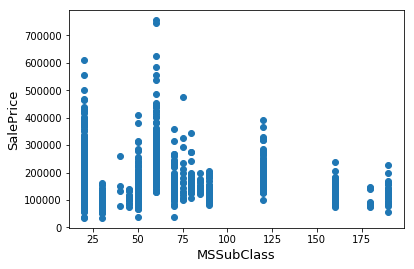

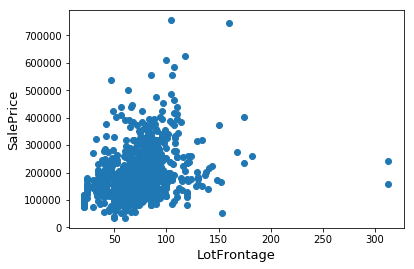

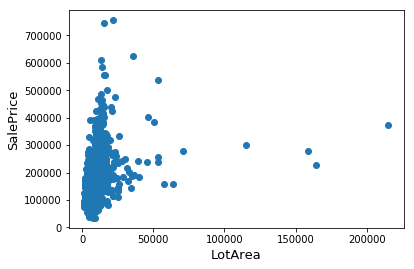

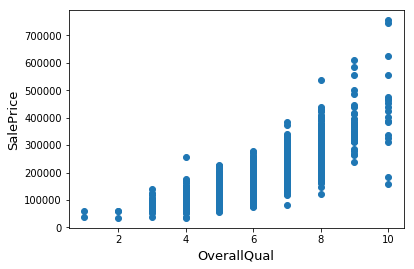

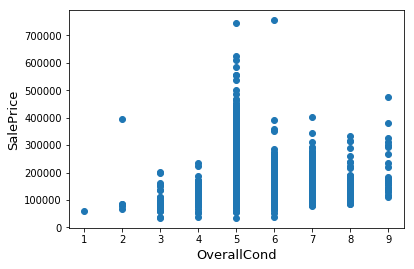

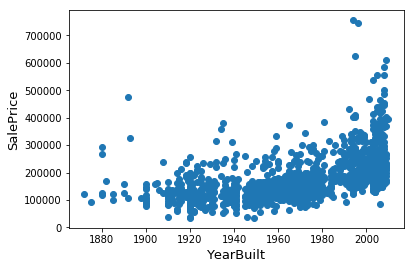

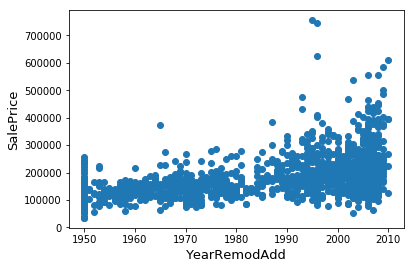

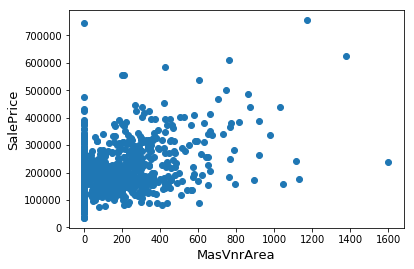

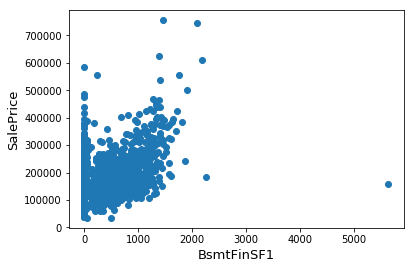

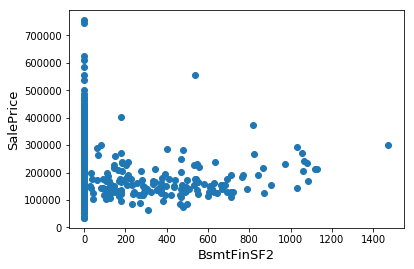

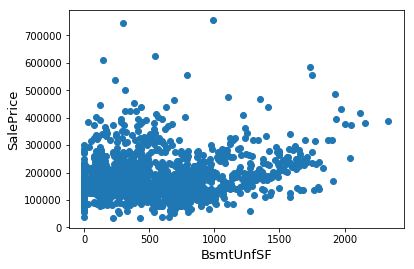

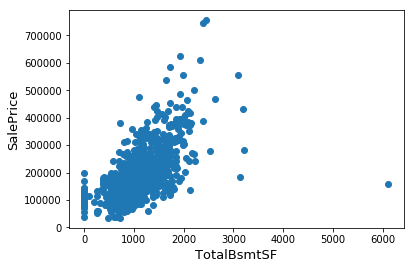

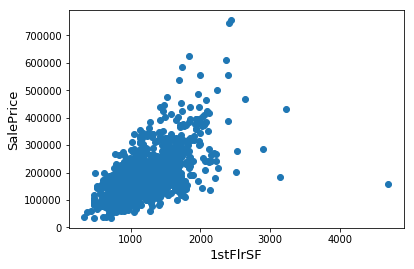

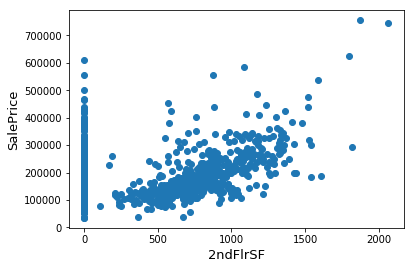

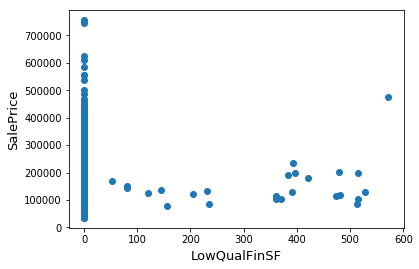

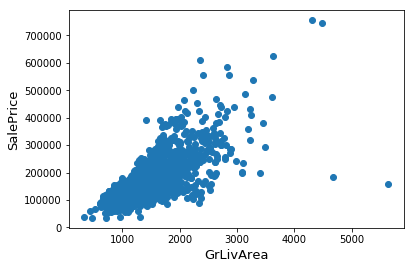

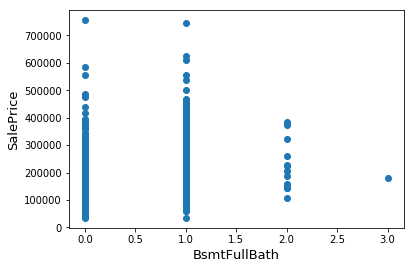

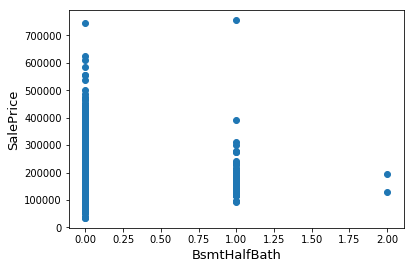

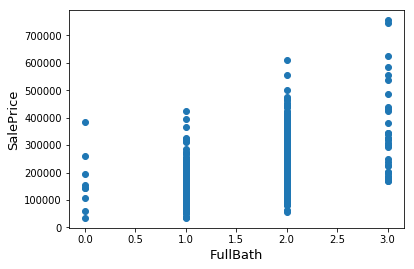

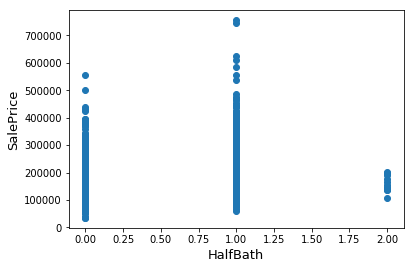

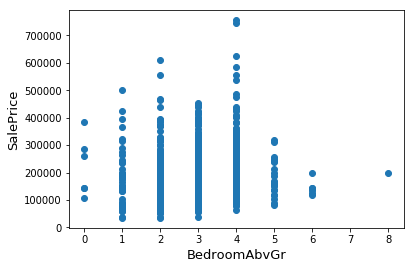

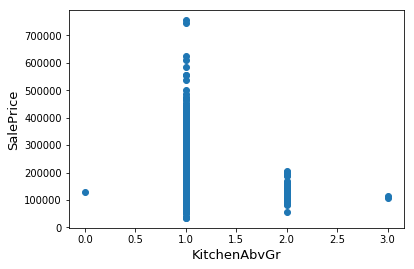

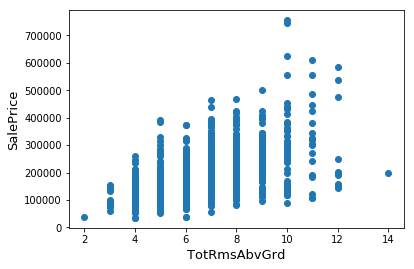

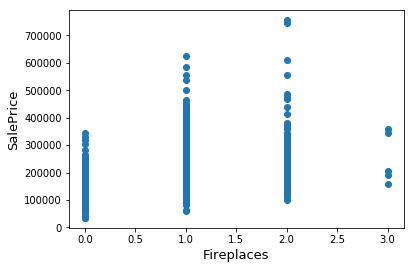

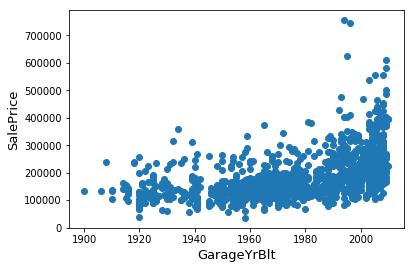

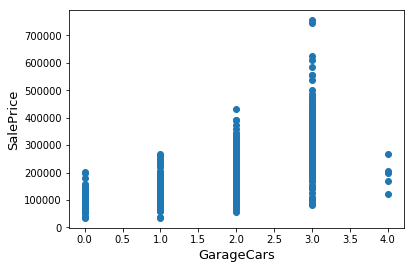

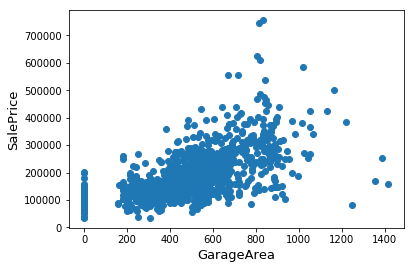

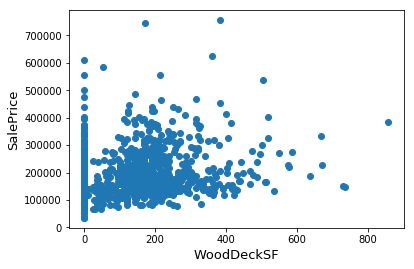

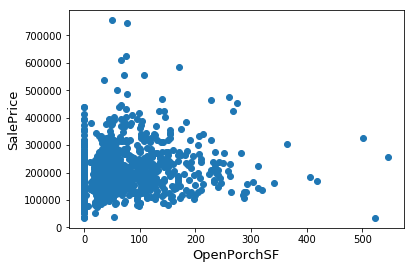

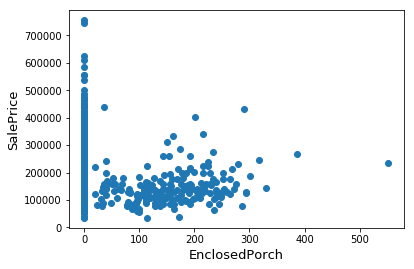

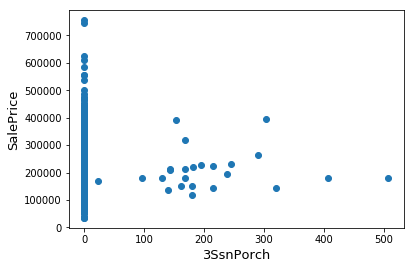

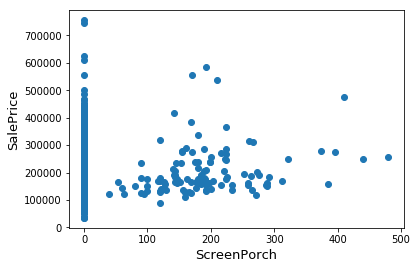

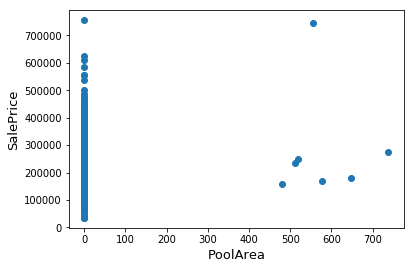

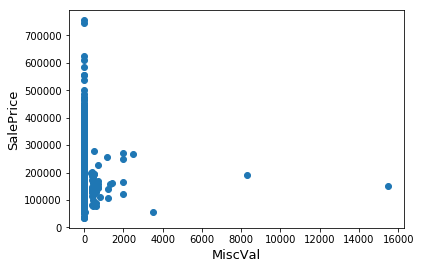

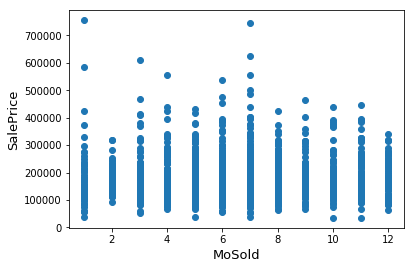

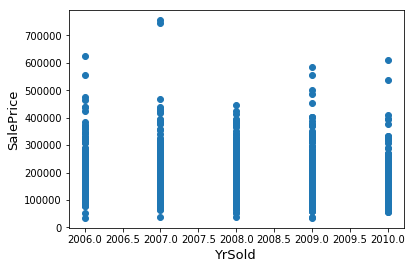

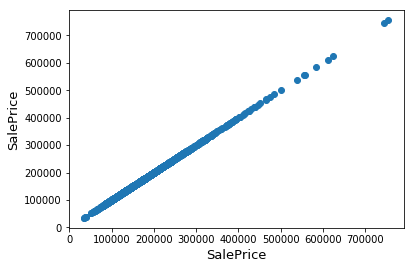

In [9]:
# Looking for outliers in numerical variables and for numerical variables that might be actually categorical
for var in num_cols:
    fig, ax = plt.subplots()
    ax.scatter(x = train[var], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(var, fontsize=13)
    plt.show()


In [10]:
#Deleting outliers
train = train.drop(train[(train['LotFrontage']>200) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['LotArea']>100000) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['BsmtFinSF1']>100000) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['TotalBsmtSF']>4000) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<500000)].index)


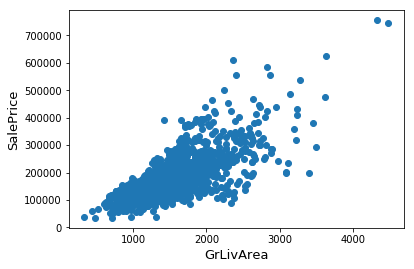

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Missing Data

In [12]:
all_data = pd.concat((train,test), keys=['train','test'])
all_data.loc['train'].head()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [13]:
for col in ('MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'):
    all_data[col] = all_data[col].apply(str)

In [14]:
# Columns with missing data
missing = all_data.isnull().sum()
missing = missing.sort_values()
print(missing[missing>0])

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
SaleType           1
GarageCars         1
Exterior1st        1
KitchenQual        1
Electrical         1
Exterior2nd        1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageQual       159
GarageFinish     159
GarageCond       159
LotFrontage      483
FireplaceQu     1420
SalePrice       1459
Fence           2341
Alley           2714
MiscFeature     2809
PoolQC          2903
dtype: int64


In [15]:
cols_with_missing = [col for col in all_data.columns if all_data[col].isnull().any()]
all_data[cols_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2912 entries, (train, 0) to (test, 1458)
Data columns (total 34 columns):
Alley           198 non-null object
BsmtCond        2830 non-null object
BsmtExposure    2830 non-null object
BsmtFinSF1      2911 non-null float64
BsmtFinSF2      2911 non-null float64
BsmtFinType1    2833 non-null object
BsmtFinType2    2832 non-null object
BsmtFullBath    2910 non-null float64
BsmtHalfBath    2910 non-null float64
BsmtQual        2831 non-null object
BsmtUnfSF       2911 non-null float64
Electrical      2911 non-null object
Exterior1st     2911 non-null object
Exterior2nd     2911 non-null object
Fence           571 non-null object
FireplaceQu     1492 non-null object
Functional      2910 non-null object
GarageArea      2911 non-null float64
GarageCars      2911 non-null float64
GarageCond      2753 non-null object
GarageFinish    2753 non-null object
GarageQual      2753 non-null object
GarageType      2755 non-null object
KitchenQual     2911

In [16]:
#Replacing NA values with not available as it represents better what the data dictionary indicates
all_data['PoolQC'].fillna('Not Available', inplace=True)
all_data['MiscFeature'].fillna('Not Available', inplace=True)
all_data['Alley'].fillna('Not Available', inplace=True)
all_data['Fence'].fillna('Not Available', inplace=True)
all_data['FireplaceQu'].fillna('Not Available', inplace=True)
all_data['BsmtCond'].fillna('Not Available', inplace=True)
all_data['BsmtQual'].fillna('Not Available', inplace=True)
all_data['GarageCond'].fillna('Not Available', inplace=True)
all_data['GarageQual'].fillna('Not Available', inplace=True)

In [17]:
missing = all_data.isnull().sum()
missing = missing.sort_values()
print(missing[missing>0])

SaleType           1
KitchenQual        1
GarageCars         1
Electrical         1
BsmtUnfSF          1
GarageArea         1
Exterior2nd        1
TotalBsmtSF        1
Exterior1st        1
BsmtFinSF2         1
BsmtFinSF1         1
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtExposure      82
GarageType       157
GarageFinish     159
LotFrontage      483
SalePrice       1459
dtype: int64


In [18]:
all_data['SaleType'].fillna(all_data.loc['train']['SaleType'].mode()[0], inplace=True)
all_data['KitchenQual'].fillna(all_data.loc['train']['KitchenQual'].mode()[0], inplace=True)
all_data['GarageCars'].fillna(all_data.loc['train']['GarageCars'].mean(), inplace=True)
all_data['Electrical'].fillna(all_data.loc['train']['Electrical'].mode()[0], inplace=True)
all_data['BsmtUnfSF'].fillna(all_data.loc['train']['BsmtUnfSF'].mean(), inplace=True)
all_data['GarageArea'].fillna(all_data.loc['train']['GarageArea'].mean(), inplace=True)
all_data['Exterior1st'].fillna(all_data.loc['train']['Exterior1st'].mode()[0], inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['Utilities'].fillna(all_data.loc['train']['Utilities'].mode()[0], inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)
all_data['MSZoning'].fillna(all_data.loc['train']['MSZoning'].mode()[0], inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)
all_data['MasVnrType'].fillna('Not Available', inplace=True)
all_data['Functional'].fillna(all_data.loc['train']['Functional'].mode()[0], inplace=True)
all_data['BsmtFinType1'].fillna('Not Available', inplace=True)
all_data['BsmtFinType2'].fillna('Not Available', inplace=True)
all_data['BsmtExposure'].fillna('Not Available', inplace=True)
all_data['GarageType'].fillna('Not Available', inplace=True)
all_data['GarageFinish'].fillna('Not Available', inplace=True)
all_data['LotFrontage'].fillna(0, inplace=True)
all_data['Exterior2nd'].fillna(all_data.loc['train']['Exterior2nd'].mode()[0], inplace=True)
all_data['TotalBsmtSF'].fillna(0, inplace=True)

In [19]:
missing = all_data.isnull().sum()
missing = missing.sort_values()
print(missing[missing>0])


SalePrice    1459
dtype: int64


In [20]:
all_data = pd.get_dummies(all_data)

In [21]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'YearRemodAdd_2006', 'YearRemodAdd_2007', 'YearRemodAdd_2008',
       'YearRemodAdd_2009', 'YearRemodAdd_2010', 'YrSold_2006', 'YrSold_2007',
       'YrSold_2008', 'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=613)

In [22]:
all_data.YrSold_2009.head()

train  0    0
       1    0
       2    0
       3    0
       4    0
Name: YrSold_2009, dtype: uint8

In [23]:
cat_cols = [cname for cname in all_data.columns 
                        if all_data[cname].nunique()==2 and all_data[cname].dtype=='uint8' ]
num_cols = [cname for cname in all_data.columns
           if all_data[cname].dtype=='int64' or all_data[cname].dtype=='float64']
my_cols = low_cardinality_cols + num_cols

In [24]:
cat_cols

['Alley_Grvl',
 'Alley_Not Available',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Not Available',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_Not Available',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Not Available',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Not Available',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_Not Available',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'C

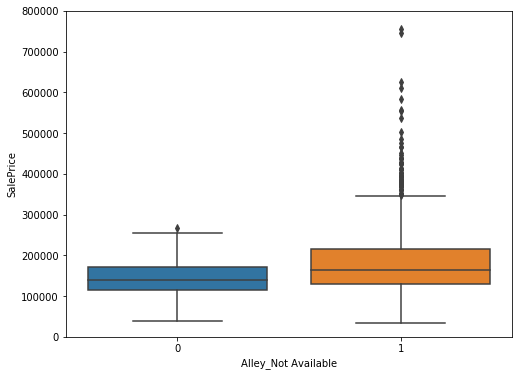

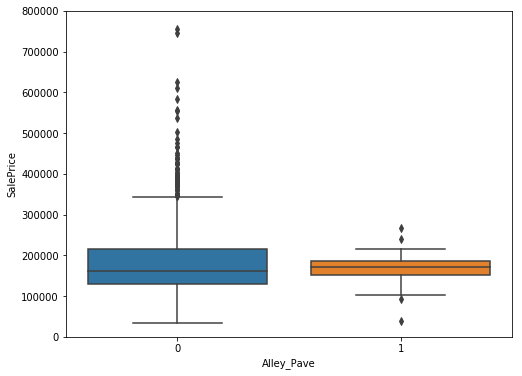

In [25]:
#box plot ----/saleprice
for var in cat_cols[1:3]:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=all_data.loc['train'])
    fig.axis(ymin=0, ymax=800000);


In [26]:
from scipy import stats
cat_pred_candidates = []
for var in cat_cols:
    a = all_data.loc['train'][var].values
    b = all_data.loc['train']['SalePrice'].values
    corr, pvalue = stats.pointbiserialr(a,b)
    if corr>0.3 or corr<-0.3:
        cat_pred_candidates.append(var)        
        print(var + ' & SalePrice corr: {} , p-value: {}'.format(corr,pvalue) )  

BsmtExposure_Gd & SalePrice corr: 0.3019580672181821 , p-value: 5.179806193841744e-32
BsmtFinType1_GLQ & SalePrice corr: 0.43748069042403975 , p-value: 5.543616416579406e-69
BsmtQual_Ex & SalePrice corr: 0.5613583240568214 , p-value: 2.0323331030589904e-121
BsmtQual_TA & SalePrice corr: -0.45194502490888666 , p-value: 4.7483417339637066e-74
ExterQual_Ex & SalePrice corr: 0.46316299785274123 , p-value: 3.756322957581236e-78
ExterQual_Gd & SalePrice corr: 0.4562673607308901 , p-value: 1.3008358041240247e-75
ExterQual_TA & SalePrice corr: -0.5947327114383397 , p-value: 1.0297545398501527e-139
Exterior1st_VinylSd & SalePrice corr: 0.3097835670019957 , p-value: 1.0947058665827265e-33
Exterior2nd_VinylSd & SalePrice corr: 0.31110403802450826 , p-value: 5.644182096538478e-34
FireplaceQu_Gd & SalePrice corr: 0.3392523270054532 , p-value: 1.8313732860701726e-40
FireplaceQu_Not Available & SalePrice corr: -0.47053891294617617 , p-value: 6.211669733348572e-81
Foundation_CBlock & SalePrice corr: -

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


HeatingQC_Ex & SalePrice corr: 0.44004090738906265 , p-value: 7.322134218647283e-70
HeatingQC_TA & SalePrice corr: -0.31778073338154217 , p-value: 1.8807807707895712e-35
KitchenQual_Ex & SalePrice corr: 0.5125874313384851 , p-value: 3.6873611764184656e-98
KitchenQual_Gd & SalePrice corr: 0.32228240449587364 , p-value: 1.806551698917835e-36
KitchenQual_TA & SalePrice corr: -0.5222907876868617 , p-value: 1.7280346159672404e-102
MSSubClass_60 & SalePrice corr: 0.38236308598547464 , p-value: 8.612910871346343e-52
MasVnrType_None & SalePrice corr: -0.37696791124716394 , p-value: 2.8150000284047234e-50
MasVnrType_Stone & SalePrice corr: 0.3334836935143109 , p-value: 4.4555711979329027e-39
Neighborhood_NoRidge & SalePrice corr: 0.3324217684246261 , p-value: 7.958988892239247e-39
Neighborhood_NridgHt & SalePrice corr: 0.4047338953885866 , p-value: 2.211990768550744e-58
SaleCondition_Partial & SalePrice corr: 0.35790596243943507 , p-value: 3.758603652444781e-45
SaleType_New & SalePrice corr: 0.

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


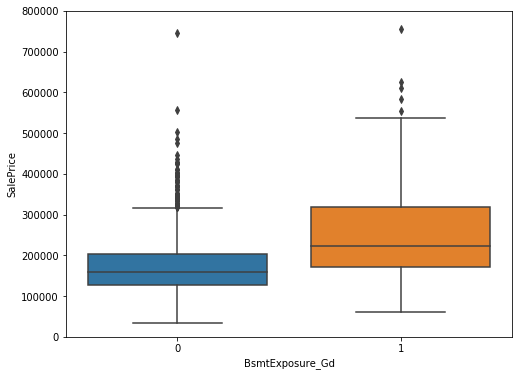

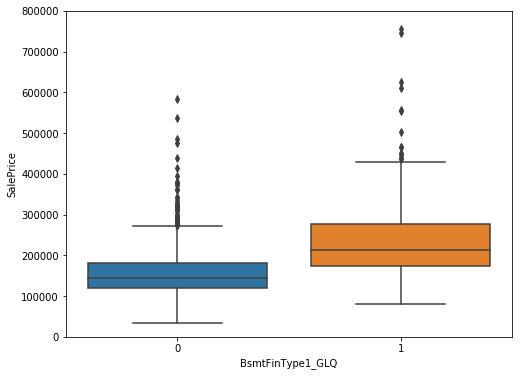

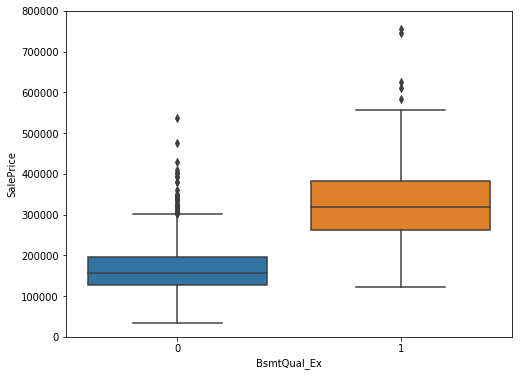

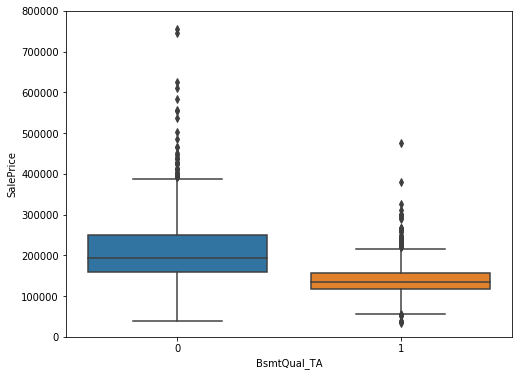

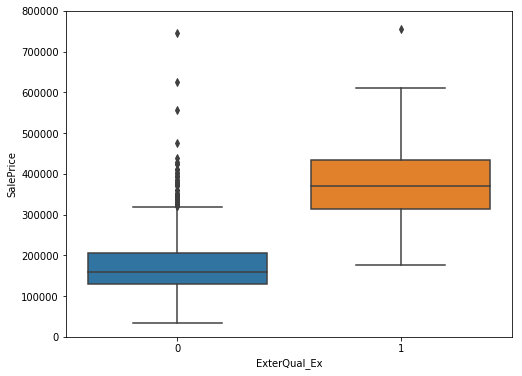

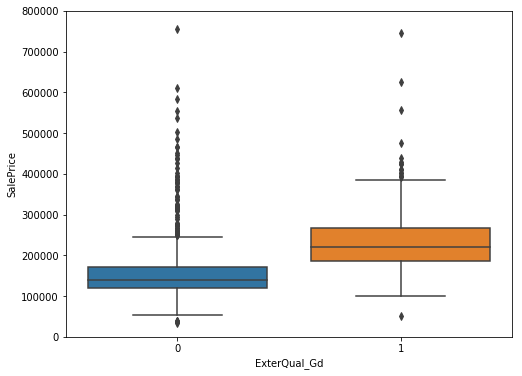

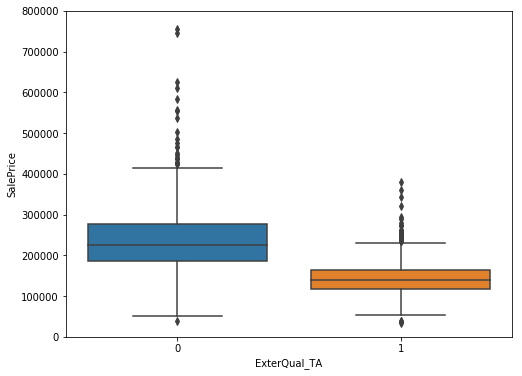

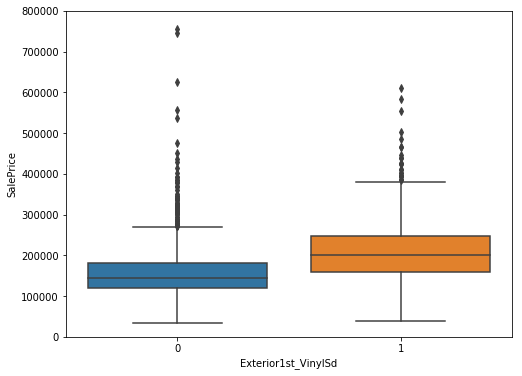

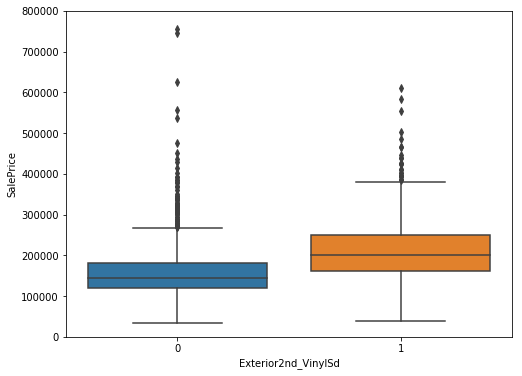

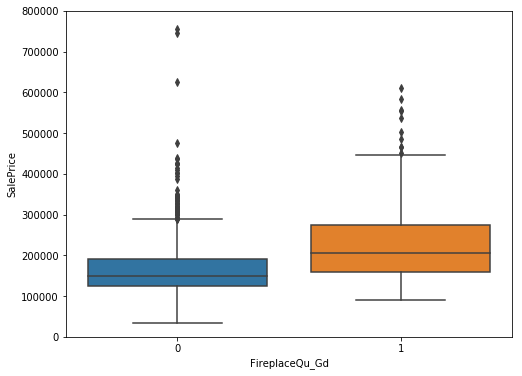

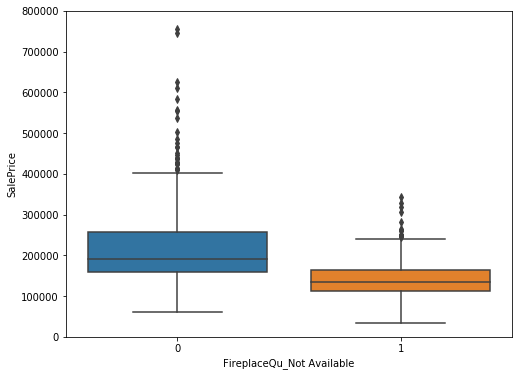

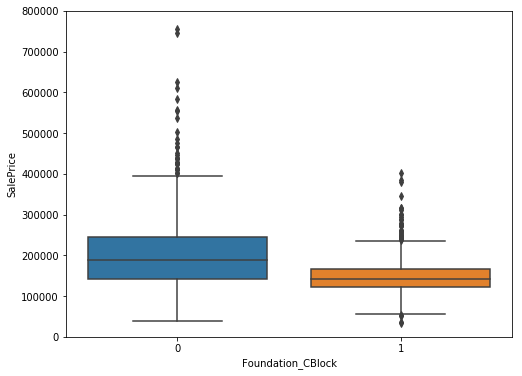

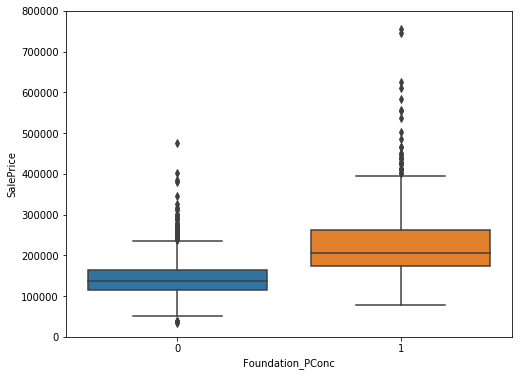

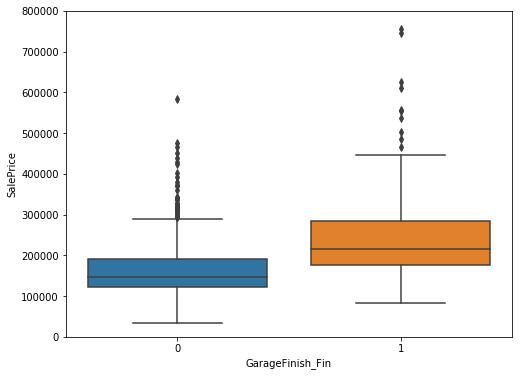

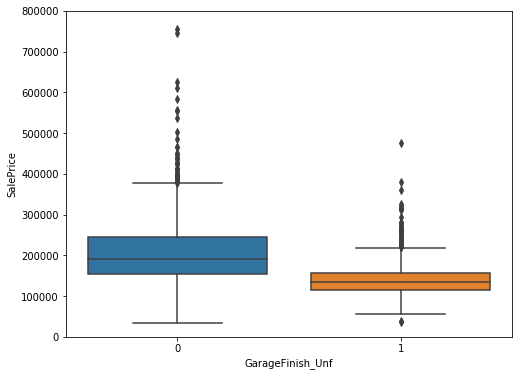

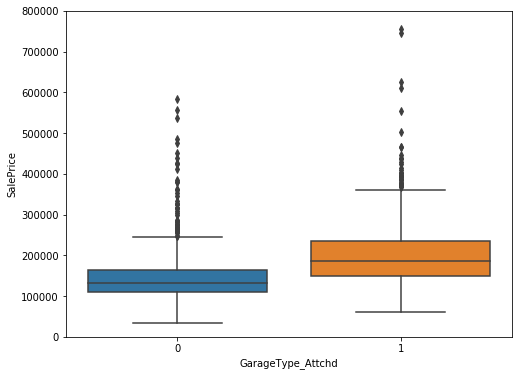

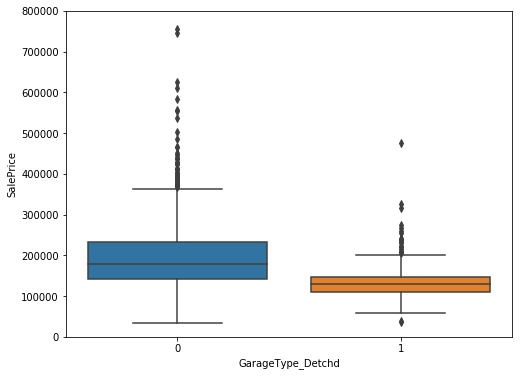

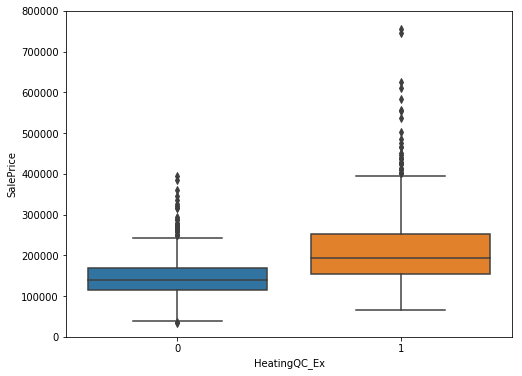

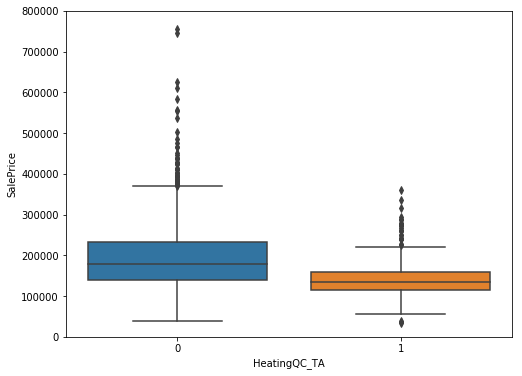

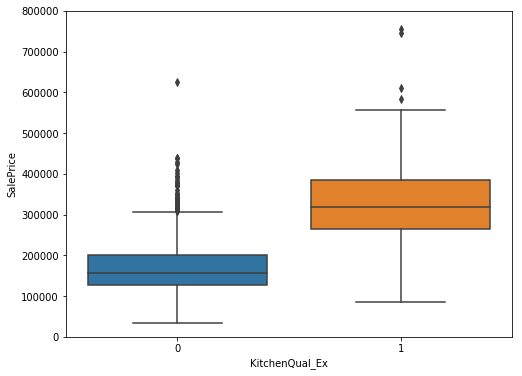

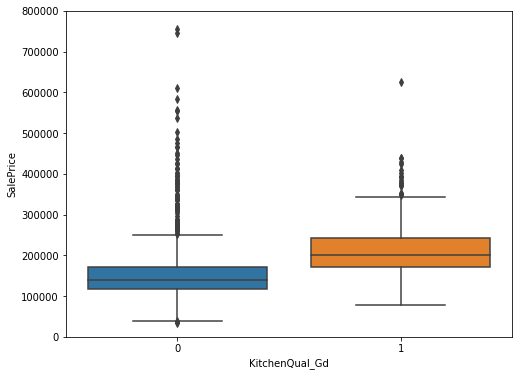

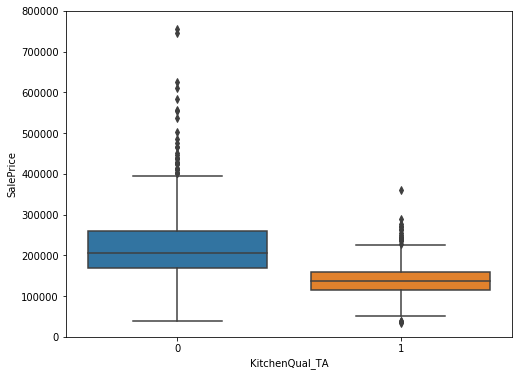

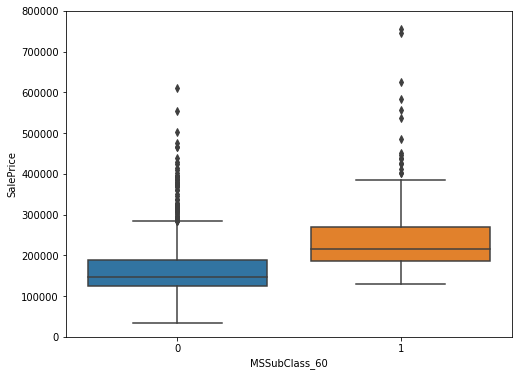

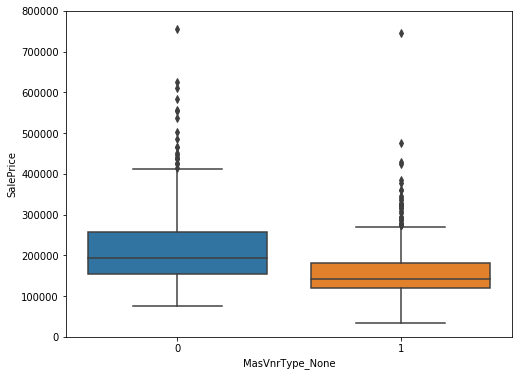

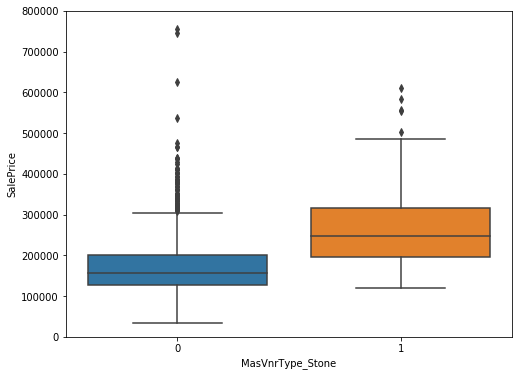

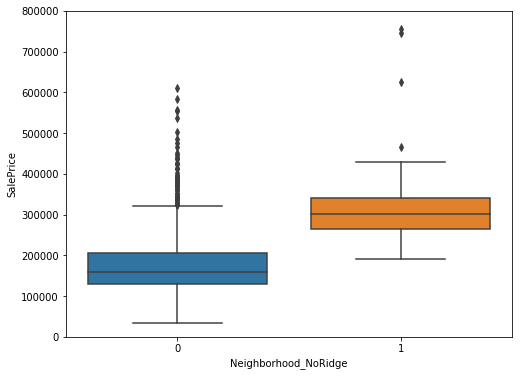

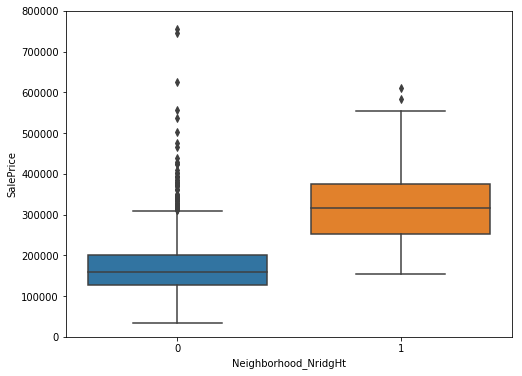

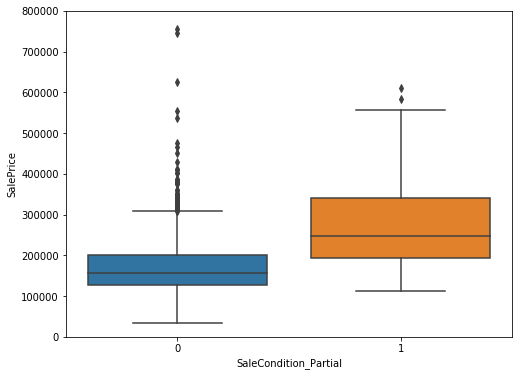

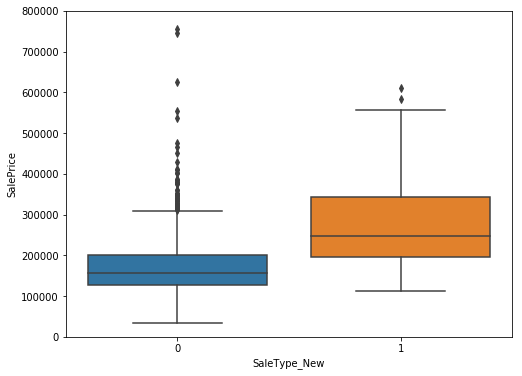

In [27]:
for var in cat_pred_candidates:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=all_data.loc['train'])
    fig.axis(ymin=0, ymax=800000);

In [30]:
#Correlation matrix to see how features are correlated with SalePrice
corrmat = all_data.loc['train'][num_cols].corr()
num_predictors = corrmat['SalePrice'][(corrmat['SalePrice']>0.3)].index.tolist()
num_predictors

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'SalePrice',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [31]:
all_predictors=cat_pred_candidates+num_predictors
all_predictors.remove('SalePrice')
len(all_predictors)

44

In [32]:
all_data.loc['train'][all_predictors].isnull().sum()

BsmtExposure_Gd              0
BsmtFinType1_GLQ             0
BsmtQual_Ex                  0
BsmtQual_TA                  0
ExterQual_Ex                 0
ExterQual_Gd                 0
ExterQual_TA                 0
Exterior1st_VinylSd          0
Exterior2nd_VinylSd          0
FireplaceQu_Gd               0
FireplaceQu_Not Available    0
Foundation_CBlock            0
Foundation_PConc             0
GarageFinish_Fin             0
GarageFinish_Unf             0
GarageType_Attchd            0
GarageType_Detchd            0
HeatingQC_Ex                 0
HeatingQC_TA                 0
KitchenQual_Ex               0
KitchenQual_Gd               0
KitchenQual_TA               0
MSSubClass_60                0
MasVnrType_None              0
MasVnrType_Stone             0
Neighborhood_NoRidge         0
Neighborhood_NridgHt         0
SaleCondition_Partial        0
SaleType_New                 0
1stFlrSF                     0
2ndFlrSF                     0
BsmtFinSF1                   0
Fireplac

## Modeling

For the modeling part, I decided to consider just tree-based models, specifically Random Forest and Gradient Tree Boosting (XGBoost). Of course this can be improved considering linear or network based models and using stacking to produce a more robust prediction.

I first used the 44 predictors selected based on the correlations, but after an iteration, including all the features produced better predictions and the selection.

The evaluation metric used is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

For the tunning, I used Grid Search and Bayesian Optimization.

In [33]:
y = all_data.loc['train'].SalePrice 
X = all_data.loc['train']
#[all_predictors]
X = X.drop('SalePrice', axis=1)

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb


forest_model = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
scorer = make_scorer(mean_squared_log_error, False)

In [41]:
%%time
print(cv_score(forest_model))

0.13816095370735118
CPU times: user 6min 54s, sys: 1.08 s, total: 6min 55s
Wall time: 1min


#### XGBoost with train-test split

In [42]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)
my_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=10, 
             eval_set=[(test_X, test_y)], 
             verbose=False,
            )


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
predictions = my_model.predict(test_X)
print(np.sqrt(mean_squared_log_error(predictions, test_y)))


0.12215417806683526


In [46]:
# Function to evaluate the model score using cross validation

def cv_score(model, fit_params=None):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(X.values)
    cv_score = np.sqrt(-cross_val_score(estimator=model, fit_params=fit_params, X=X, y=y, scoring = scorer,cv=kf))
    return cv_score.mean()

#### XGboost Tunning with Bayesian Optimization

In [47]:
# Just for eta y n_estimators

#https://github.com/fmfn/BayesianOptimization/blob/master/examples/xgboost_example.py
from bayes_opt import BayesianOptimization
def xgb_evaluate(eta, num_rounds):

    params['eta'] = max(eta,0)
    params['num_boost_round'] = max(num_rounds, 0)


    cv_result = xgb.cv(params, xgtrain, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(10)])

    return -cv_result['test-rmse-mean'].values[-1]

xgtrain = xgb.DMatrix(X, label=np.log1p(y))
#num_rounds = 3000
random_state = 2018
num_iter = 25
init_points = 5
params = {
#'n_estimators': 0.01,
    'silent': 1,
    'eval_metric': 'rmse',
    'verbose_eval': True,
    'seed': random_state
    }

xgbBO = BayesianOptimization(xgb_evaluate, {'eta': (0.01, 0.3),
                                            'num_rounds':(500,5000)
                                                })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

Initialization
--------------------------------------------------------
 Step |   Time |      Value |       eta |   num_rounds | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    1 | 00m00s |   -0.47482 |    0.2791 |    2995.7101 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    2 | 00m00s |   -0.42768 |    0.2875 |    2085.4940 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    3 | 00m00s |   -7.95498 |    0.0365 |     800.4090 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    4 | 00m00s |   -9.35954 |    0.0207 |    1676.4140 | 
Multiple eval metrics have been passed: 'test-rmse' will be used f

In [48]:
#For rest of parameters with eta and estimators fixed

#https://github.com/fmfn/BayesianOptimization/blob/master/examples/xgboost_example.py
import xgboost as xgb
from bayes_opt import BayesianOptimization
def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):


    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(10)])

    return -cv_result['test-rmse-mean'].values[-1]

xgtrain = xgb.DMatrix(X, label=np.log1p(y))
num_rounds = 500
random_state = 2018
num_iter = 25
init_points = 5
params = {
    'eta': 0.3,
    'silent': 1,
    'eval_metric': 'rmse',
    'verbose_eval': True,
    'seed': random_state
    }

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.1, 1),
                                                'max_depth': (4,8),
                                                'subsample': (0.5, 1),
                                                'gamma': (0, 5),
                                                'alpha': (0, 10)
                                                })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    1 | 00m00s |   -0.43070 |    8.5440 |             0.1365 |    2.6585 |      6.3930 |            11.0817 |      0.6830 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    2 | 00m00s |   -0.41454 |    7.4998 |             0.7518 |    1.3220 |      4.7136 |             6.4171 |      0.8509 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    3 | 00m00s |   -0.40685 |    4.4032 |             0.4

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.58293521e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
    9 | 00m16s |   -0.37677 |    0.0290 |             0.9266 |    0.3349 |      4.1479 |            10.6338 |      0.5466 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.83097938e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   10 | 00m17s |   -0.37099 |    0.0745 |             0.9449 |    0.0578 |      5.3980 |             2.2366 |      0.9664 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   11 | 00m17s |   -0.37002 |    0.0572 |             0.9973 |    0.0022 |      4.0241 |            15.6172 |      0.8791 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   12 | 00m16s |   -0.36924 |    0.0383 |             0.9870 |    0.6928 |      4.0505 |            11.8909 |      0.9984 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   13 | 00m17s |   -0.38471 |    0.1335 |            

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.70428136e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   18 | 00m17s |   -0.36960 |    0.0390 |             0.9557 |    0.1013 |      5.5470 |            11.3599 |      0.9873 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   19 | 00m18s |   -0.37025 |    0.1840 |             0.9727 |    0.0611 |      4.2440 |            19.8331 |      0.9821 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00164193]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   20 | 00m17s |   -0.37101 |    0.1557 |             0.8961 |    0.0657 |      7.0442 |             6.0580 |      0.9852 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0003291]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   21 | 00m17s |   -0.41350 |    8.1655 |             0.9004 |    0.2754 |      4.0003 |            19.4940 |      0.9042 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([7.90699814e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00018941]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   22 | 00m18s |   -0.37185 |    0.0052 |             0.9996 |    0.8500 |      5.7210 |            13.1153 |      0.9810 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00022774]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   23 | 00m18s |   -0.38777 |    0.4200 |             0.9830 |    4.9914 |      4.1020 |             2.2771 |      0.9190 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   24 | 00m18s |   -0.36844 |    0.1382 |             0.5067 |    0.0678 |      7.9585 |            19.5623 |      0.9874 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   25 | 00m18s |   -0.36954 |    0.1145 |             0.8886 |    0.0213 |      4.1190 |             5.7710 |      0.8877 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([9.30913375e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00018922]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   26 | 00m18s |   -0.36971 |    0.0483 |             0.6948 |    0.3306 |      7.1868 |            18.5584 |      0.9911 | 


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.72876133e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   27 | 00m18s |   -0.37265 |    0.1964 |             0.7953 |    0.9434 |      7.7626 |            18.7372 |      0.9917 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   28 | 00m19s |   -0.37247 |    0.1760 |             0.9394 |    0.0635 |      4.5317 |             3.3454 |      0.9775 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   29 | 00m21s |   -0.38416 |    0.1422 |             0.8992 |    4.8511 |      7.8220 |            13.8930 |      0.9505 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
   30 | 00m19s |   -0.36917 |    0.0352 |            

In [56]:
#Using XGboost with the parameters obtained from Bayesian Optimization

# xbg_1 uses just n_estimators and learning rate as to compare the influence of the other extra parameters used in xgb_2

xgb_1= xgb.XGBRegressor(n_estimators=500, learning_rate=0.3)


#Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsampl
# 24 | 00m18s |   -0.36844 |    0.1382 |             0.5067 |    0.0678 |      7.9585 |            19.5623 |      0.9874 | 

xgb_2 = xgb.XGBRegressor(
                 colsample_bytree=0.5067,
                 gamma=0.0678,
                 learning_rate=0.3,
                 max_depth=8,
                 min_child_weight=20,
                 n_estimators=500,                                                                  
                 reg_alpha=0.1382,
                 reg_lambda=0.6,
                 subsample=0.9874,
                 seed=42,
                 silent=1
                    )


In [50]:
%%time
print(cv_score(xgb_1))

0.12965510166970126
CPU times: user 59.5 s, sys: 8 ms, total: 59.5 s
Wall time: 59.5 s


In [57]:
%%time
print(cv_score(xgb_2))

0.13709303076436014
CPU times: user 42.5 s, sys: 8 ms, total: 42.5 s
Wall time: 42.5 s


In [53]:
%%time
# Grid search for learning rate and n_estimators

# Adapted from https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
model = xgb.XGBRegressor()
n_estimators = [100, 500, 1000, 3000, 5000,10000]
learning_rate = [0.01,0.03,0.05, 0.1, 0.2 ,0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_log_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best: 0.139192 using {'learning_rate': 0.01, 'n_estimators': 5000}
-0.245235 (0.039460) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.024662 (0.008220) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.021002 (0.006353) with: {'learning_rate': 0.01, 'n_estimators': 1000}
-0.019407 (0.005783) with: {'learning_rate': 0.01, 'n_estimators': 3000}
-0.019374 (0.005719) with: {'learning_rate': 0.01, 'n_estimators': 5000}
-0.019520 (0.005804) with: {'learning_rate': 0.01, 'n_estimators': 10000}
-0.031807 (0.012226) with: {'learning_rate': 0.03, 'n_estimators': 100}
-0.020147 (0.006259) with: {'learning_rate': 0.03, 'n_estimators': 500}
-0.019502 (0.005945) with: {'learning_rate': 0.03, 'n_estimators': 1000}
-0.019533 (0.006065) with: {'learning_rate': 0.03, 'n_estimators': 3000}
-0.019671 (0.006019) with: {'learning_rate': 0.03, 'n_estimators': 5000}
-0.019817 (0.005967) with: {'learning_rate': 0.03, 'n_estimators': 10000}
-0.024397 (0.007971) with: {'learning_rate': 0.05, 'n_estim

In [54]:
#from xgboost import XGBRegressor
xgb_3= xgb.XGBRegressor(n_estimators=5000, learning_rate=0.01)

In [55]:
%%time
print(cv_score(xgb_3))

0.1192527655223889
CPU times: user 9min 59s, sys: 60 ms, total: 9min 59s
Wall time: 9min 59s


**Best model: XGBoost with n_estimators=5000 and learning_rate=0.01**